In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats

In [3]:
# Import the csv
data=pd.read_csv("data/measurements.csv")

In [4]:
data

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


## Data exploration

In [5]:
data.describe()

,speed,temp_outside,AC,rain,sun
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,41.927835,11.358247,0.077320,0.123711,0.082474
std,13.598524,6.991542,0.267443,0.329677,0.275441
min,14.000000,-5.000000,0.000000,0.000000,0.000000
25%,32.750000,7.000000,0.000000,0.000000,0.000000
50%,40.500000,10.000000,0.000000,0.000000,0.000000
75%,50.000000,16.000000,0.000000,0.000000,0.000000
max,90.000000,31.000000,1.000000,1.000000,1.000000


In [14]:
# I have "numerical" columns missing, let's see what are the data types
data.dtypes

distance         object
consume          object
speed             int64
temp_inside      object
temp_outside      int64
specials         object
gas_type         object
AC                int64
rain              int64
sun               int64
refill liters    object
refill gas       object
dtype: object

In [15]:
# Exploring the missing data
data.isnull().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

In [18]:
#Transform the numerical columns to float
data['distance'] = data['distance'].str.replace(',','.').astype('float32')
data['consume'] = data['consume'].str.replace(',','.').astype('float32')
data['temp_inside'] = data['temp_inside'].str.replace(',','.').astype('float32')
data['refill liters'] = data['refill liters'].str.replace(',','.').astype('float32')
data['specials'] = data['specials'].str.lower()

In [19]:
data

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,NaN,SP98,0,0,0,NaN,NaN
384,16.1,4.3,38,25.0,31,ac,SP98,1,0,0,NaN,NaN
385,16.0,3.8,45,25.0,19,NaN,SP98,0,0,0,NaN,NaN
386,15.4,4.6,42,25.0,31,ac,SP98,1,0,0,NaN,NaN


In [22]:
data.describe()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters
count,388.000000,388.000000,388.000000,376.000000,388.000000,388.000000,388.000000,388.000000,13.000000
mean,19.652830,4.912370,41.927835,21.929522,11.358247,0.077320,0.123711,0.082474,37.115387
std,22.667839,1.033172,13.598524,1.010455,6.991542,0.267443,0.329677,0.275441,8.587282
min,1.300000,3.300000,14.000000,19.000000,-5.000000,0.000000,0.000000,0.000000,10.000000
25%,11.800000,4.300000,32.750000,21.500000,7.000000,0.000000,0.000000,0.000000,37.599998
50%,14.600000,4.700000,40.500000,22.000000,10.000000,0.000000,0.000000,0.000000,38.000000
75%,19.000000,5.300000,50.000000,22.500000,16.000000,0.000000,0.000000,0.000000,39.000000
max,216.100006,12.200000,90.000000,25.500000,31.000000,1.000000,1.000000,1.000000,45.000000


In [24]:
# For the missing values in temp_inside I'll fill them with the average of the column since the std is quite low
data['temp_inside']=data['temp_inside'].fillna("21.92")

In [26]:
data.shape

(388, 12)

In [27]:
#Only 93 rows have special events, which is a 24% of the data, should it be taken into account?
#Drop the special column since we have the information dummified in the AC/rain/sun columns

data=data.drop(columns='specials')
data

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0,0,0,NaN,NaN
384,16.1,4.3,38,25.0,31,SP98,1,0,0,NaN,NaN
385,16.0,3.8,45,25.0,19,SP98,0,0,0,NaN,NaN
386,15.4,4.6,42,25.0,31,SP98,1,0,0,NaN,NaN


In [38]:
data.dtypes

distance         float32
consume          float32
speed              int64
temp_inside       object
temp_outside       int64
gas_type          object
AC                 int64
rain               int64
sun                int64
refill liters    float32
refill gas        object
dtype: object

In [39]:
data['temp_inside'] = data['temp_inside'].str.replace(',','.').astype('float32')

In [40]:
data.groupby(['gas_type']).agg({'consume':'mean','speed':'mean','temp_outside':'mean','temp_inside':'mean'})

,consume,speed,temp_outside,temp_inside
gas_type,,,,
E10,4.931250,43.506250,10.11875,21.92
SP98,4.899123,40.820175,12.22807,21.92


In [45]:
#Encode the gas_type into 1/2 to have numerial values as well:
def gas(col):
    if col == 'E10':
        return 1
    if col == 'SP98':
        return 2

In [47]:
data['gas_type']=data['gas_type'].apply(gas)

<AxesSubplot:>

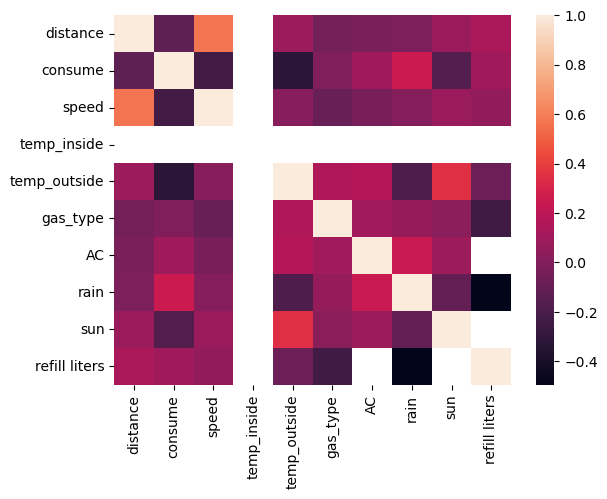

In [48]:
sns.heatmap(data.corr())

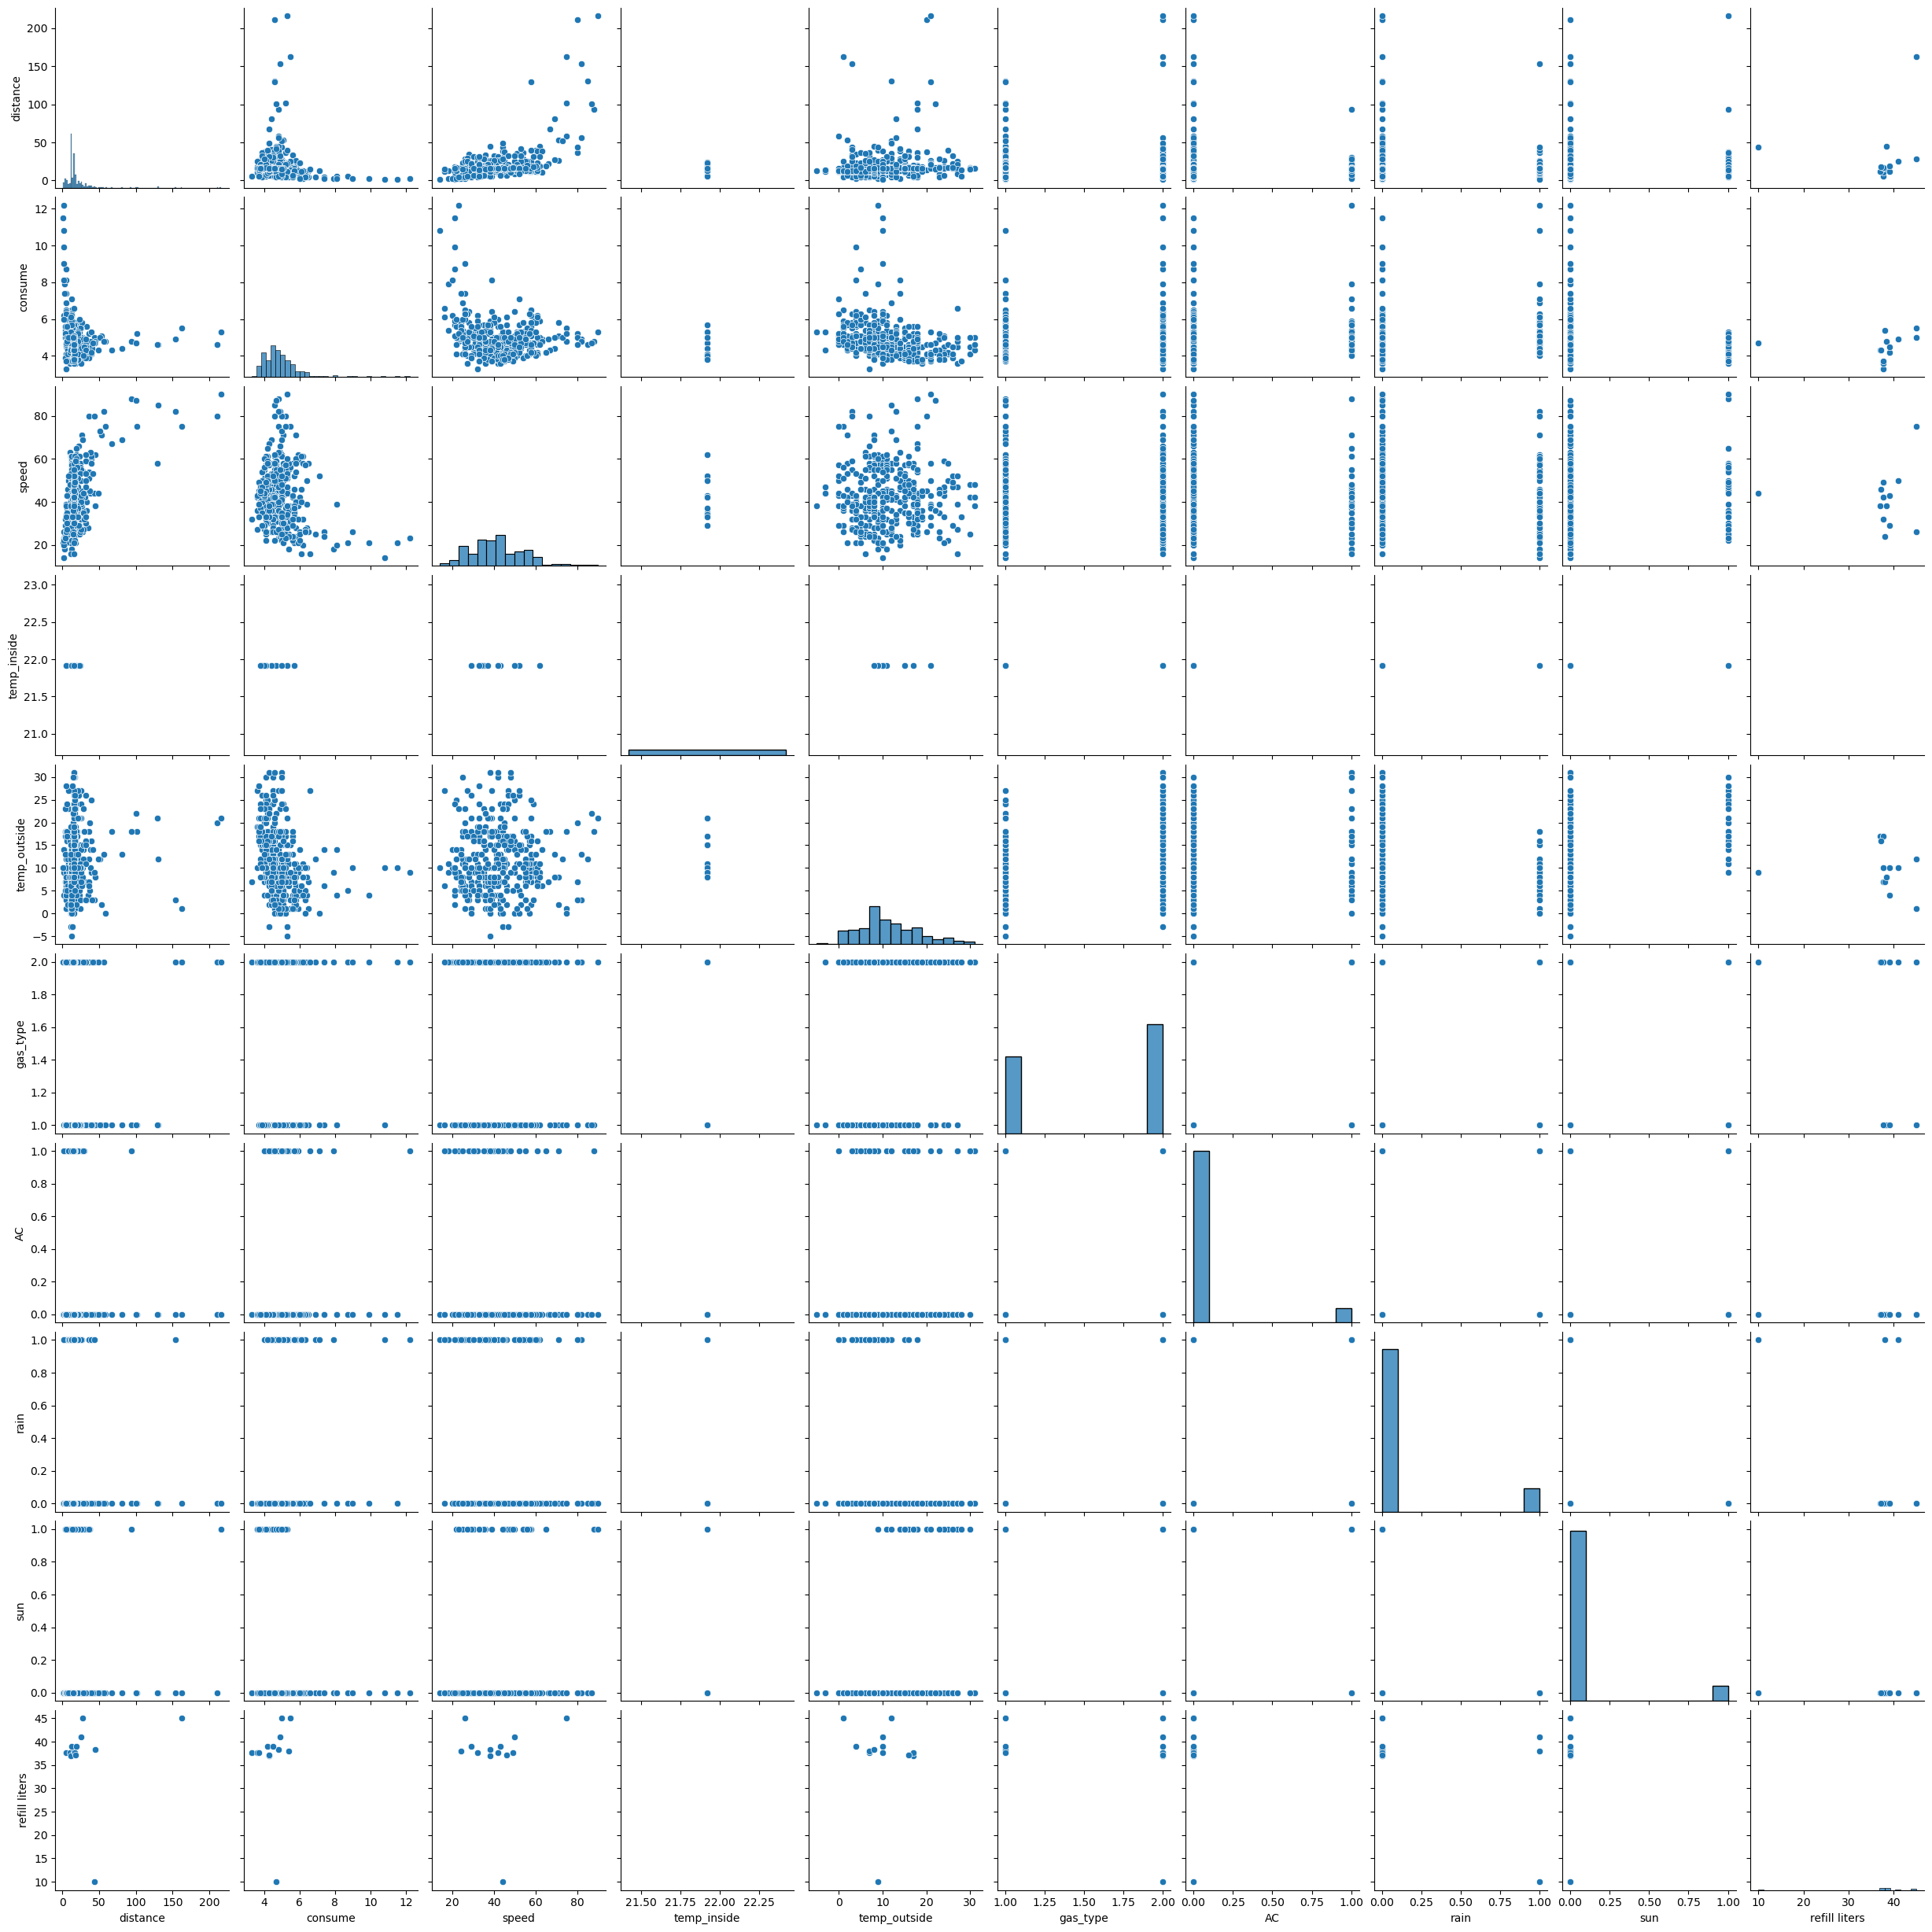

In [50]:
sns.pairplot(data)

In [51]:
data=data.drop(columns='temp_inside')

In [53]:
data.head()

,distance,consume,speed,temp_outside,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,12,1,0,0,0,45.0,E10
1,12.0,4.2,30,13,1,0,0,0,NaN,NaN
2,11.2,5.5,38,15,1,0,0,0,NaN,NaN
3,12.9,3.9,36,14,1,0,0,0,NaN,NaN
4,18.5,4.5,46,15,1,0,0,0,NaN,NaN


In [54]:
data['gas_type'].value_counts()

2    228
1    160
Name: gas_type, dtype: int64

In [56]:
data.pivot_table(index= ['gas_type', 'AC'],aggfunc = {'consume':'mean','speed':'mean','temp_outside':'mean'})

consume      speed  temp_outside
gas_type AC                                   
1        0   4.922876  43.130719     10.052288
         1   5.114286  51.714286     11.571429
2        0   4.854146  41.273171     11.741463
         1   5.300000  36.782609     16.565217

In [57]:
data.pivot_table(index= ['gas_type', 'rain'],aggfunc = {'consume':'mean','speed':'mean','temp_outside':'mean'})

consume      speed  temp_outside
gas_type rain                                   
1        0     4.856945  43.513889     10.326389
         1     5.600000  43.437500      8.250000
2        0     4.786224  40.678571     12.964286
         1     5.590625  41.687500      7.718750

In [58]:
data.pivot_table(index= ['gas_type', 'sun'],aggfunc = {'consume':'mean','speed':'mean','temp_outside':'mean'})

consume      speed  temp_outside
gas_type sun                                   
1        0    4.972297  42.993243      9.689189
         1    4.425000  49.833333     15.416667
2        0    4.960096  40.600962     11.302885
         1    4.265000  43.100000     21.850000

In [69]:
# calculate the Pearson correlation coefficient and p-value
corr, p_val = stats.pearsonr(data["speed"], data["consume"])

# print the results
print("Pearson correlation coefficient: {:.3f}".format(corr))
print(p_val)

Pearson correlation coefficient: -0.228
5.7947563621027145e-06


In [70]:
corr, p_val = stats.pearsonr(data["temp_outside"], data["consume"])

# print the results
print("Pearson correlation coefficient: {:.3f}".format(corr))
print(p_val)

Pearson correlation coefficient: -0.321
9.757133752558643e-11


In [72]:
# We can see that temp_outside and consume are dependant since the p-value is less than 0.05